In [36]:
# import import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import plot_tree

In [37]:
# load iris data

from sklearn.datasets import load_iris
data = load_iris()

In [38]:
# create dataframe

df = pd.DataFrame(data.data,columns=data.feature_names)

In [39]:
# create target variable

df['target'] = data.target

In [40]:
# final dataframe

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
# checking the columns

df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [42]:
# create x and y

x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y = df['target']

In [43]:
# train test split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [44]:
# performing transformation

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [45]:
x_train

array([[-1.2372317 ,  0.76595552, -1.16737825, -1.27146664],
       [-1.3569638 ,  0.32511781, -1.33608807, -1.27146664],
       [-1.2372317 , -0.1157199 , -1.27985146, -1.13867639],
       [-0.2793749 , -0.77697646,  0.29477355,  0.18922611],
       [-0.8780354 ,  0.54553666, -1.11114164, -0.87309589],
       [-1.4766959 ,  0.10469896, -1.22361485, -1.27146664],
       [-0.9977675 , -0.1157199 , -1.16737825, -1.27146664],
       [-0.9977675 ,  1.20679323, -1.27985146, -1.27146664],
       [-0.9977675 ,  0.76595552, -1.16737825, -1.00588614],
       [ 0.4390177 , -0.33613875,  0.35101016,  0.18922611],
       [ 0.1995535 , -1.87907073,  0.74466641,  0.45480661],
       [ 0.6784819 , -0.33613875,  0.35101016,  0.18922611],
       [ 0.3192856 , -0.99739531,  1.08208606,  0.32201636],
       [ 0.6784819 , -0.55655761,  1.08208606,  1.38433835],
       [ 1.1574103 ,  0.32511781,  1.25079588,  1.5171286 ],
       [ 0.5587498 , -1.21781417,  0.74466641,  0.9859676 ],
       [-0.1596428 ,  2.

In [46]:
# decision tree model

decision_model = DecisionTreeClassifier(criterion='gini',max_depth=3)
decision_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [47]:
# prediction from tree

decision_model.predict(x_test)

array([1, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0,
       1, 0, 0, 0, 2, 1, 1, 1])

In [48]:
# confusion matrix

confusion_matrix(y_test,decision_model.predict(x_test))

array([[8, 0, 0],
       [0, 9, 0],
       [0, 6, 7]])

[Text(0.4, 0.875, 'petal length (cm) <= -0.689\ngini = 0.666\nsamples = 120\nvalue = [42, 41, 37]\nclass = setosa'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'petal width (cm) <= 0.787\ngini = 0.499\nsamples = 78\nvalue = [0, 41, 37]\nclass = versicolor'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'petal length (cm) <= 0.941\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]\nclass = versicolor'),
 Text(0.2, 0.125, 'gini = 0.046\nsamples = 42\nvalue = [0, 41, 1]\nclass = versicolor'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = virginica')]

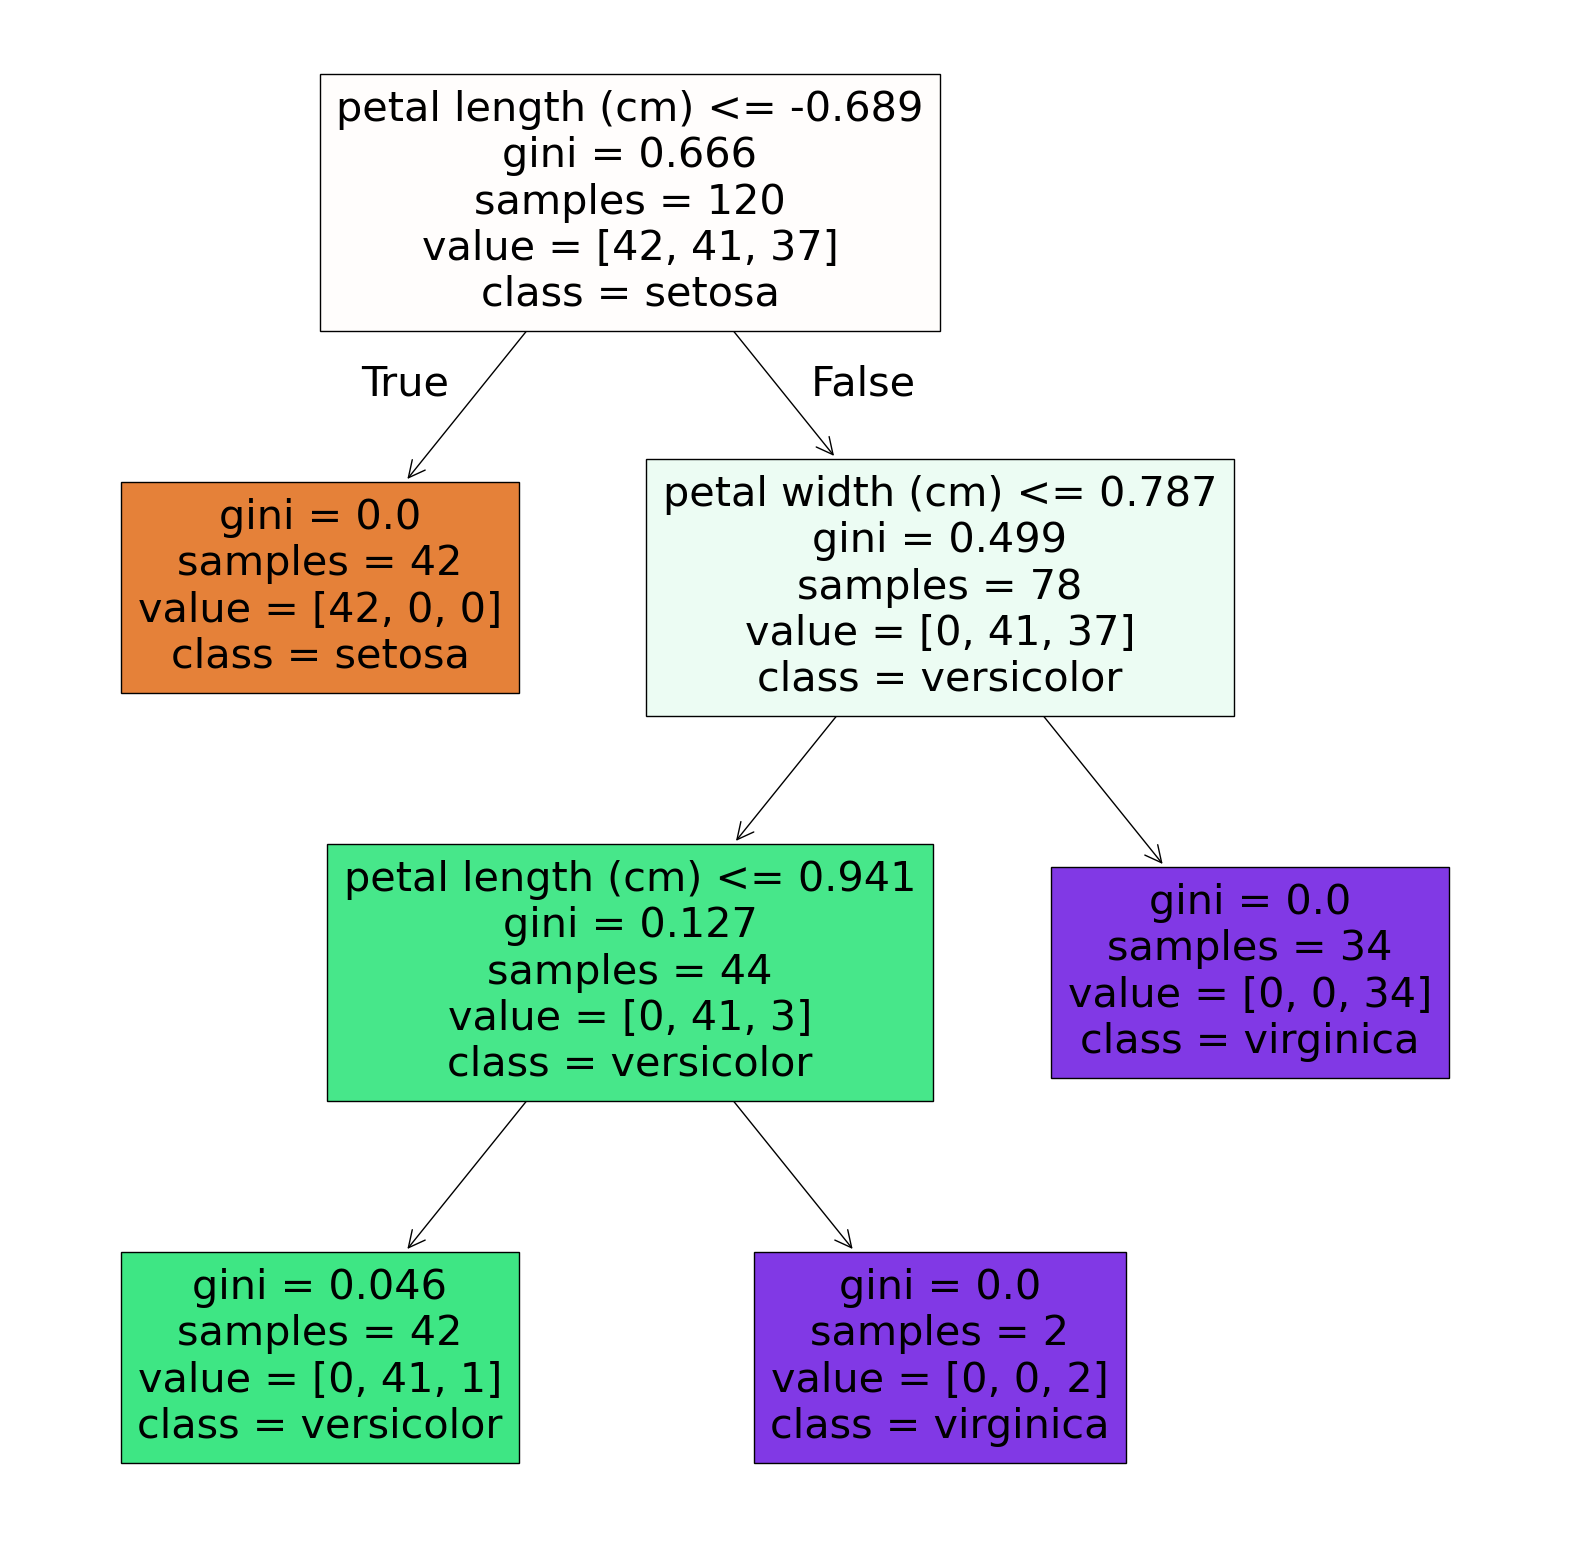

In [61]:
# plot decision tree

plt.figure(figsize=(20,20))
plot_tree(decision_model,feature_names=data.feature_names,class_names=data.target_names,filled=True)

In [64]:
# decision tree model with different depth

decision_model = DecisionTreeClassifier(criterion='gini',max_depth=5)
decision_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [67]:
# plot decision tree

plt.figure(figsize=(150,75))
plot_tree(decision_model,feature_names=data.feature_names,class_names=data.target_names,filled=True)

[Text(0.5, 0.9166666666666666, 'petal length (cm) <= -0.689\ngini = 0.666\nsamples = 120\nvalue = [42, 41, 37]\nclass = setosa'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.41666666666666663, 0.8333333333333333, 'True  '),
 Text(0.6666666666666666, 0.75, 'petal width (cm) <= 0.787\ngini = 0.499\nsamples = 78\nvalue = [0, 41, 37]\nclass = versicolor'),
 Text(0.5833333333333333, 0.8333333333333333, '  False'),
 Text(0.5, 0.5833333333333334, 'petal length (cm) <= 0.941\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]\nclass = versicolor'),
 Text(0.3333333333333333, 0.4166666666666667, 'petal length (cm) <= 0.717\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]\nclass = versicolor'),
 Text(0.16666666666666666, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]\nclass = versicolor'),
 Text(0.5, 0.25, 'sepal width (cm) <= -1.328\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]\nclass = versicolor'),
 Text(0.3333333333333333, 0.0833333

In [71]:
print(f"classification report : {classification_report(y_test,decision_model.predict(x_test))}")

classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.60      1.00      0.75         9
           2       1.00      0.54      0.70        13

    accuracy                           0.80        30
   macro avg       0.87      0.85      0.82        30
weighted avg       0.88      0.80      0.80        30

